In [14]:
import numpy as np
from collections import Counter

### Calculate Euclidean Distance and Find K-Nearest Neighbors

In [65]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        #Calculate the Eculidian Distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        #sort the distances and select the indices of the k smallest distances
        k_indices = np.argsort(distances)[:self.k]
        
        #Retrieves the labels of the based on the indices
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        #Use Counter to count the occurrences of each label and then retrieves the most common label
        most_common = Counter(k_nearest_labels).most_common()
        
        #most_common_label, i = mode(k_nearest_labels)

        return most_common[0][0]

### Import and plot the data

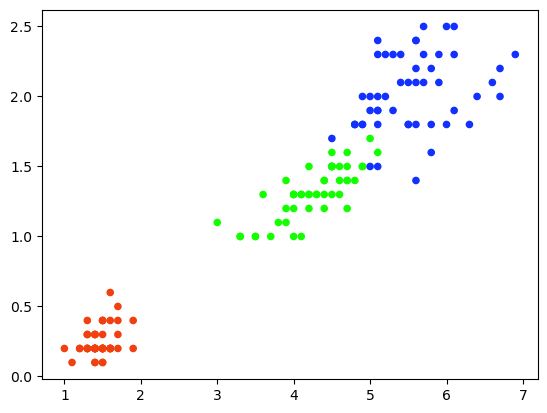

In [72]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#F13F10','#13FF00','#1230FF'])

data = datasets.load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, s=20) #Plotting using the 3rd and the 4th column(Can be changed)
plt.show()

### Fit the model

In [67]:
classifier = KNN(k=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("The predictions are:\n\n",predictions)

The predictions are:

 [2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0]


In [68]:
def accuracy(y_test, predictions):
    accuracy = np.sum(predictions == y_test) / len(y_test)
    return accuracy

In [69]:
print("Accuracy: ",accuracy(y_test, predictions))

Accuracy:  0.9666666666666667
